# Embedded ML - Lab 1.1: Native implementation of Artificial Neural Netwroks

#Jose Andres Henao Alzate
#CC 1036686332

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

In [ ]:
import random
import numpy as np
class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    for i in range(len(x)):
      self.myY.append(x[i]*self.w + self.b)
    return self.myY

  def error(self, y):
    #y esperadas
    total_square_error = 0

    for i in range(len(y)):
      total_square_error += (y[i]-self.myY[i])**2
    total_square_error /= len(y)

    return total_square_error

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}

# 1. Assign values to globals w and b
#Valores para A
wi_a = 2.0
bi_a = -1.0

wa1=wi_a-1
wa2= wi_a+0.2
wa3= wi_a
ba1=bi_a-0.5
ba2=bi_a
ba3= bi_a

#Valores para los regresores de B.

# para encontrar pendiente promedio.
#Con este código, se encontró una pendiente promedio para los datos de B.

def pendiente(y2,y1,x2,x1):
  return (y2-y1)/(x2-x1)

l1=datasets['B']['input']
l2=datasets['B']['output']


promedio=0
for i in range(0,len(datasets['B']['input'])-1):
  promedio+=pendiente(l2[i+1],l2[i],l1[i+1],l1[i])


promedio/=len(l1)

print("La pendiente promedio obtenida es: {} ".format(promedio))

#Con este bloque de código se encontró el valor de b, con el que se da el menor error. Se partió del valor de pendiente promedio obtenido previamente.

menor_error = 100
valor_bias = 0
wi_b=promedio
bi_b=0
for i in np.arange(-100, 100, 0.3):
    #wi_b = promedio
    bi_b = i
    regresor_b = LinRegressor(wi_b, bi_b)
    y_predict_b = regresor_b.predict(datasets['B']['input'])
    y_error_b = regresor_b.error(datasets['B']['output'])

    if (y_error_b < menor_error):
        menor_error = y_error_b
        valor_bias = bi_b

print("El valor del menor error cuadrático medio obtenido es: {}, y este se logró con un 'b' igual a: {}".format(menor_error,valor_bias))





#wi_b = promedio
bi_b = valor_bias

wb1=wi_b-1
wb2= wi_b+0.3
wb3= wi_b
bb1=bi_b-0.5
bb2=bi_b+0.5
bb3= bi_b





# 2. Instantiate the LinRegressor class
#Para los regresores de A
regresor_a1 = LinRegressor(wa1,ba1)
regresor_a2= LinRegressor(wa2,ba2)
regresor_a3= LinRegressor(wa3,ba3)

#Para los regresores de B
regresor_b1 = LinRegressor(wb1,bb1)
regresor_b2= LinRegressor(wb2,bb2)
regresor_b3= LinRegressor(wb3,bb3)

# 3. Perform 484a prediction using dataset A or B
y_predict_a1 = regresor_a1.predict(datasets['A']['input'])
y_predict_a2 =regresor_a2.predict(datasets['A']['input'])
y_predict_a3 =regresor_a3.predict(datasets['A']['input'])


y_predict_b1 = regresor_b1.predict(datasets['B']['input'])
y_predict_b2 = regresor_b2.predict(datasets['B']['input'])
y_predict_b3 = regresor_b3.predict(datasets['B']['input'])
#print(y_predict_b)

# 4. Measure the error
y_error_a1 = regresor_a1.error(datasets['A']['output'])
y_error_a2 = regresor_a2.error(datasets['A']['output'])
y_error_a3 = regresor_a3.error(datasets['A']['output'])

y_error_b1 = regresor_b1.error(datasets['B']['output'])
y_error_b2 = regresor_b2.error(datasets['B']['output'])
y_error_b3 = regresor_b3.error(datasets['B']['output'])



La pendiente promedio obtenida es: 0.45172626642363484 
El valor del menor error cuadrático medio obtenido es: 2.056987287963659, y este se logró con un 'b' igual a: -0.7000000000009408


* Error obtenido por los regresores del conjunto A

In [ ]:
print("El error de los regresores de A son respectivamente: {}, {}, {}".format(y_error_a1,y_error_a2,y_error_a3))

El error de los regresores de A son respectivamente: 24.25, 0.8200000000000015, 0.0


* Gráficas de los regresores de A.

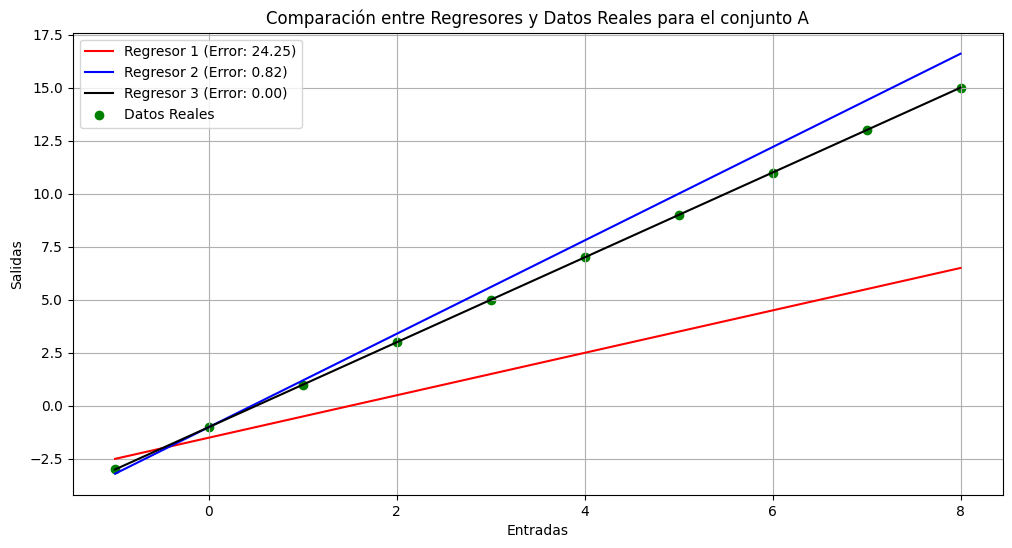

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

entradas_a = datasets['A']['input']
salidas_a = datasets['A']['output']

plt.plot(entradas_a, y_predict_a1, label=f"Regresor 1 (Error: {y_error_a1:.2f})", color="red")
plt.plot(entradas_a, y_predict_a2, label=f"Regresor 2 (Error: {y_error_a2:.2f})", color="blue")
plt.plot(entradas_a, y_predict_a3, label=f"Regresor 3 (Error: {y_error_a3:.2f})", color="black")

plt.scatter(entradas_a, salidas_a, color="green", label="Datos Reales")

plt.xlabel("Entradas")
plt.ylabel("Salidas")
plt.legend()
plt.grid()
plt.title("Comparación entre Regresores y Datos Reales para el conjunto A")

plt.show()



* Gráfica de los regresores de B

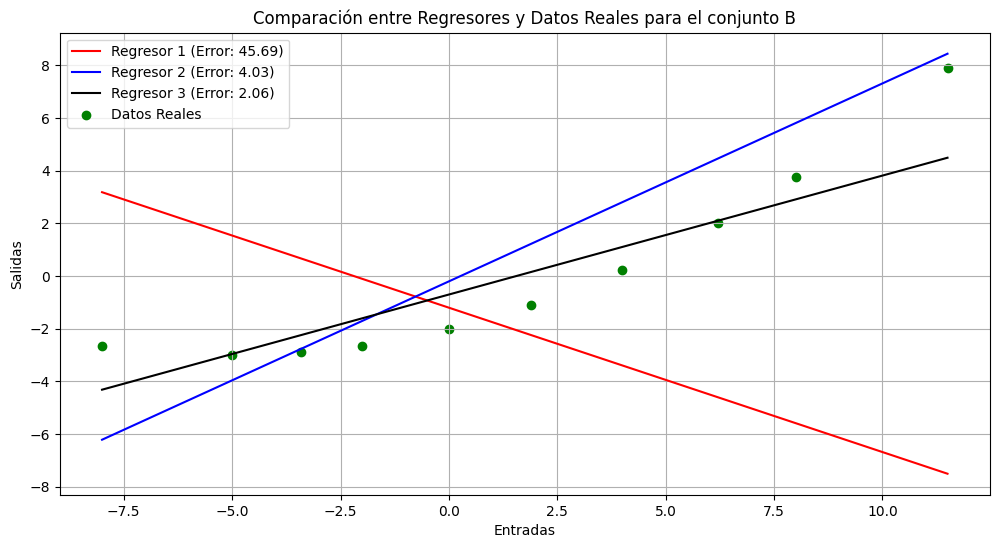

In [ ]:
entradas_b= datasets['B']['input']
salidas_b= datasets['B']['output']

plt.figure(figsize=(12, 6))
plt.plot(entradas_b, y_predict_b1, label=f"Regresor 1 (Error: {y_error_b1:.2f})", color="red")
plt.plot(entradas_b, y_predict_b2, label=f"Regresor 2 (Error: {y_error_b2:.2f})", color="blue")
plt.plot(entradas_b, y_predict_b3, label=f"Regresor 3 (Error: {y_error_b3:.2f})", color="black")

plt.scatter(entradas_b, salidas_b, color="green", label="Datos Reales")

plt.xlabel("Entradas")
plt.ylabel("Salidas")
plt.legend()
plt.grid()
plt.title("Comparación entre Regresores y Datos Reales para el conjunto B")

plt.show()

Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

Respuestas a las preguntas planteadas.


* Si, el error en en el dataset A, puede y es cero para uno de los regresores, específicamente para el regresor 3 como se ve en la primera gráfica.
* No, puesto que el comportamiento natural de los valores de entrada y salida no presentan linealidad, por ende, siempre existirá un error, como se ve en la segunda gráfica, donde el menor valor de error fue de 2.06 (usando el error cuadrático medio). Para que este quizá tomase un valor de cero, sería necesario otros tipos de regresiones cuyos comportamientos sean no lineales.
* No necesariamente, aunque en algunos casos el error cero represente que el sistema esta 100% caracterizado por la ecuación encontrada, pueden existir otros casos en los cuales el comportamiento del fenómeno sea linea solo en un tramo y no en todo el fenómeno, en este caso, sería necesario hacer una regresión lineal por tramos. En pocas palabras, solo se puede asegurar que para los datos usados en el "entrenamiento", la ecuación modela el comportamiento de estos al 100%.
* No, solo modelos que tengan comportamientos lineales, esto se puede ver en la gráfica de los regresores del dataset B, donde el comportamiento natural de los datos no es lineal.

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        resultado = []
        for i in range(len(A)):
            fila_resultado = []
            for j in range(len(B[0])):
                suma_producto = 0
                for k in range(len(B)):
                    suma_producto += A[i][k] * B[k][j]
                fila_resultado.append(suma_producto)
            resultado.append(fila_resultado)
        return resultado

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation
        self.salida_neurona = np.array(self.my_dot(x, self.weights_input_hidden)) + self.bias_input_hidden
        self.salida_neurona = self.sigmoid(self.salida_neurona)

        # Guardamos la salida de la capa oculta para el backward
        #se soluciona el error de la no definicioón de hidden_output
        self.hidden_output = self.salida_neurona

        # Cálculo de la salida final
        self.output = np.array(self.my_dot(self.salida_neurona, self.weights_hidden_output)) + self.bias_hidden_output
        self.output = self.sigmoid(self.output)

        return self.output

    def backward(self, x, y, output, learning_rate):
      #Cálculo del error general
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)
      #Cálculo del error y el delta de la capa oculta
        self.hidden_error = np.array(self.my_dot(d_output, self.weights_hidden_output.T))
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Actualización de pesos
        self.weights_hidden_output += np.array(self.my_dot(self.hidden_output.T, d_output)) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.array(self.my_dot(x.T, d_hidden)) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {loss:.4f}')

# Definir conjunto de datos XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Inicializar y entrenar la red neuronal
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.5)

def umbral(x):
  if(x<0.5):
    return 0
  return 1

# Probar el modelo entrenado
print("\nPruebas del modelo entrenado:")
for i in range(len(X)):
    output = nn.forward(X[i].reshape(1, -1))
    print("Entrada: {}, Salida Predicha: {}, Salida Real: {}".format(X[i],umbral(output),y[i]))


Epoch 0: Loss = 0.2990
Epoch 100: Loss = 0.1400
Epoch 200: Loss = 0.0536
Epoch 300: Loss = 0.0249
Epoch 400: Loss = 0.0147
Epoch 500: Loss = 0.0100
Epoch 600: Loss = 0.0075
Epoch 700: Loss = 0.0059
Epoch 800: Loss = 0.0048
Epoch 900: Loss = 0.0040
Epoch 1000: Loss = 0.0035
Epoch 1100: Loss = 0.0030
Epoch 1200: Loss = 0.0027
Epoch 1300: Loss = 0.0024
Epoch 1400: Loss = 0.0022
Epoch 1500: Loss = 0.0020
Epoch 1600: Loss = 0.0018
Epoch 1700: Loss = 0.0017
Epoch 1800: Loss = 0.0016
Epoch 1900: Loss = 0.0015
Epoch 2000: Loss = 0.0014
Epoch 2100: Loss = 0.0013
Epoch 2200: Loss = 0.0012
Epoch 2300: Loss = 0.0012
Epoch 2400: Loss = 0.0011
Epoch 2500: Loss = 0.0010
Epoch 2600: Loss = 0.0010
Epoch 2700: Loss = 0.0010
Epoch 2800: Loss = 0.0009
Epoch 2900: Loss = 0.0009
Epoch 3000: Loss = 0.0008
Epoch 3100: Loss = 0.0008
Epoch 3200: Loss = 0.0008
Epoch 3300: Loss = 0.0007
Epoch 3400: Loss = 0.0007
Epoch 3500: Loss = 0.0007
Epoch 3600: Loss = 0.0007
Epoch 3700: Loss = 0.0007
Epoch 3800: Loss = 0.000

Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

* Como primer paso, se definen las siguientes variables:
  * N= Cantidad entradas a la red neuronal.
  * M= Cantidad de neuronas en la capa oculta.
  * K= Cantidad de neurona en la capa de salida.
  * P= Cantidad de épocas de entrenamiento.




**Forward Pass**: \\
* Para el forward pass, es necesario tener en cuenta la cantidad de operaciones básica en la capa oculta y salida.
En la capa oculta, para el caso de una neurona de la capa oculta se tienen las siguientes operaciones:
    * N+1 multiplicaciones, N sumas y 1 una función de activación. El total de operaciones en esta neurona es: 2(N+1). El total de operaciones de la capa oculta será: 2M(N+1)
* Para el caso de la capa de salida, se tienen las siguientes operaciones:
    * M+1 multiplicaciones, M sumas y 1 una función de activación. El total de operaciones en esta neurona es: 2(M+1). El total de operaciones de la capa oculta será: 2K(M+1).
$$
\text{Forward pass} = 2 \left( M (N+1) + K (M+1) \right)
$$

**Una iteracción de entrenamiento**: \\
* Para un iteracción en el entrenamiento, se toman dos partes: el forward previamente calculado y el backpropagatio. El cálculo del back propagation es:
    * El cálculo del error para un neurona de la capa de salida requiere 3 operaciones (una resta, una multiplicación y una evaluación de la derivada de la función de activación.). En total se requieren 3K operaciones en la capa.
    * Una neura en la capa oculta hará K multiplicaciones, K-1 sumas, y 2 operaciones adicionales. La capa oculta hará en total M(2K+1) operaciones.
    * En la actualización de los bias y pesos:
        * Para la capa de salida se necesitan K(3M+2) operaciones.
        * Par la capa oculta se necesitan M(3N+2).
    * El total de operacion es:
      $$
\text{Backpropagation} = 5K + 5KM + 3M + 3NM
$$

*El total de operacion es:
$$  \text{Forward pass}+\text{Backpropagation}$$
$$
\text{Cantidad de cálculos para una iteración de entrenamiento} = 7K+7KM+5M+5NM
$$

**Cantidad de operaciones para todo el entrenamiento**: \\
$$
\text{Cantidad total de cálculos para el entrenamiento completo} = P(7K+7KM+5M+5NM)
$$




**Parámetros que definen la cantidad de cálculos computaiconales**: \\



Como se pudo observar en las ecuaciones deducidas anteriormente, estas dependen de M, P, K y N. Por ende, solo dependen de cantidad de entradas a la red, cantidad de neuronas en la capa oculta, cantidad de neuronas en la capa de salida y de las épocas de entrenamiento.




In [ ]:
N = 2
M = 4
K = 1
P = 1000

forward_pass = 2 * (M * (N + 1) + K * (M + 1))
backpropagation = 5 * K + 5 * K * M + 3 * M + 3 * N * M

operaciones_iteracion = forward_pass + backpropagation
operaciones_totales = P * operaciones_iteracion

print("Operaciones del forward pass:", forward_pass)
print("Operaciones por iteración:", operaciones_iteracion)
print("Operaciones totales para", P, "épocas:", operaciones_totales)


Operaciones del forward pass: 34
Operaciones por iteración: 95
Operaciones totales para 1000 épocas: 95000


### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.

In [ ]:
def calcular_forward_ops(input_size, hidden_size, output_size):
    return 2 * (hidden_size * (input_size + 1) + output_size * (hidden_size + 1))

def contar_parametros(input_size, hidden_size, output_size):
    return (input_size * hidden_size + hidden_size) + (hidden_size * output_size + output_size)


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# --------- Utilidades ---------

def one_hot(etiquetas):
    salida = np.zeros((len(etiquetas), 10))
    for i, valor in enumerate(etiquetas):
        salida[i][valor] = 1
    return salida

# --------- Clase de Red Neuronal ---------

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(42)
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivada_sigmoid(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def mse(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, x, y, salida, learning_rate):
        error = salida - y
        d_w2 = np.dot(self.a1.T, error)
        d_b2 = np.sum(error, axis=0, keepdims=True)

        d_a1 = np.dot(error, self.w2.T) * self.derivada_sigmoid(self.a1)
        d_w1 = np.dot(x.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)

        self.w2 -= learning_rate * d_w2
        self.b2 -= learning_rate * d_b2
        self.w1 -= learning_rate * d_w1
        self.b1 -= learning_rate * d_b1

    def train(self, X, y, epochs, learning_rate, X_val, y_val, hidden_size):
        errores = []
        precisiones = []
        tiempos = []
        operaciones = []

        for epoca in range(epochs):
            inicio = time.time()

            salida = self.forward(X)
            error = self.mse(y, salida)
            self.backward(X, y, salida, learning_rate)

            predicciones = np.argmax(self.forward(X_val), axis=1)
            reales = np.argmax(y_val, axis=1)
            precision = np.mean(predicciones == reales)

            fin = time.time()
            forward_ops = 2 * (hidden_size * (784 + 1) + 10 * (hidden_size + 1))

            errores.append(error)
            precisiones.append(precision)
            tiempos.append(fin - inicio)
            operaciones.append(forward_ops)

            print(f"Época {epoca+1}: Error={error:.4f}, Precisión={precision*100:.2f}%, Tiempo={fin - inicio:.2f}s")

        return errores, precisiones, tiempos, operaciones

# --------- Preparar datos ---------

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) / 255

# Dividir entrenamiento en entrenamiento + validación
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

y_train_one = one_hot(y_train_final)
y_val_one = one_hot(y_val)
y_test_one = one_hot(y_test)

# --------- Experimentos con distintos tamaños de capa oculta ---------

ocultas = [16, 32, 64, 128, 256]
resultados = {}

for h in ocultas:
    print(f"\n\nEntrenando modelo con {h} neuronas ocultas...")
    modelo = NeuralNetwork(input_size=784, hidden_size=h, output_size=10)
    errores, precisiones, tiempos, operaciones = modelo.train(
        x_train_final, y_train_one, epochs=30,
        learning_rate=0.0001, X_val=x_val, y_val=y_val_one, hidden_size=h)

    # Evaluación final en test
    salida_test = modelo.forward(x_test)
    predicciones_test = np.argmax(salida_test, axis=1)
    precision_final = np.mean(predicciones_test == y_test)

    resultados[h] = {
        'errores': errores,
        'precisiones': precisiones,
        'tiempos': tiempos,
        'operaciones': operaciones,
        'precision_final_test': precision_final
    }




Entrenando modelo con 16 neuronas ocultas...
Época 1: Error=0.1320, Precisión=17.62%, Tiempo=0.43s
Época 2: Error=0.0978, Precisión=15.32%, Tiempo=0.37s
Época 3: Error=0.0951, Precisión=28.11%, Tiempo=0.36s
Época 4: Error=0.0877, Precisión=23.51%, Tiempo=0.39s
Época 5: Error=0.0882, Precisión=34.80%, Tiempo=0.36s
Época 6: Error=0.0791, Precisión=36.67%, Tiempo=0.94s
Época 7: Error=0.0779, Precisión=41.60%, Tiempo=0.98s
Época 8: Error=0.0728, Precisión=44.96%, Tiempo=0.71s
Época 9: Error=0.0713, Precisión=47.07%, Tiempo=0.78s
Época 10: Error=0.0673, Precisión=50.51%, Tiempo=0.45s
Época 11: Error=0.0654, Precisión=52.66%, Tiempo=0.36s
Época 12: Error=0.0624, Precisión=54.50%, Tiempo=0.39s
Época 13: Error=0.0607, Precisión=56.14%, Tiempo=0.37s
Época 14: Error=0.0586, Precisión=57.77%, Tiempo=0.37s
Época 15: Error=0.0572, Precisión=58.80%, Tiempo=0.39s
Época 16: Error=0.0556, Precisión=60.30%, Tiempo=0.36s
Época 17: Error=0.0545, Precisión=60.87%, Tiempo=0.36s
Época 18: Error=0.0532, Pre

**Gráfica de la evolución del accuracy en función de las épocas.**

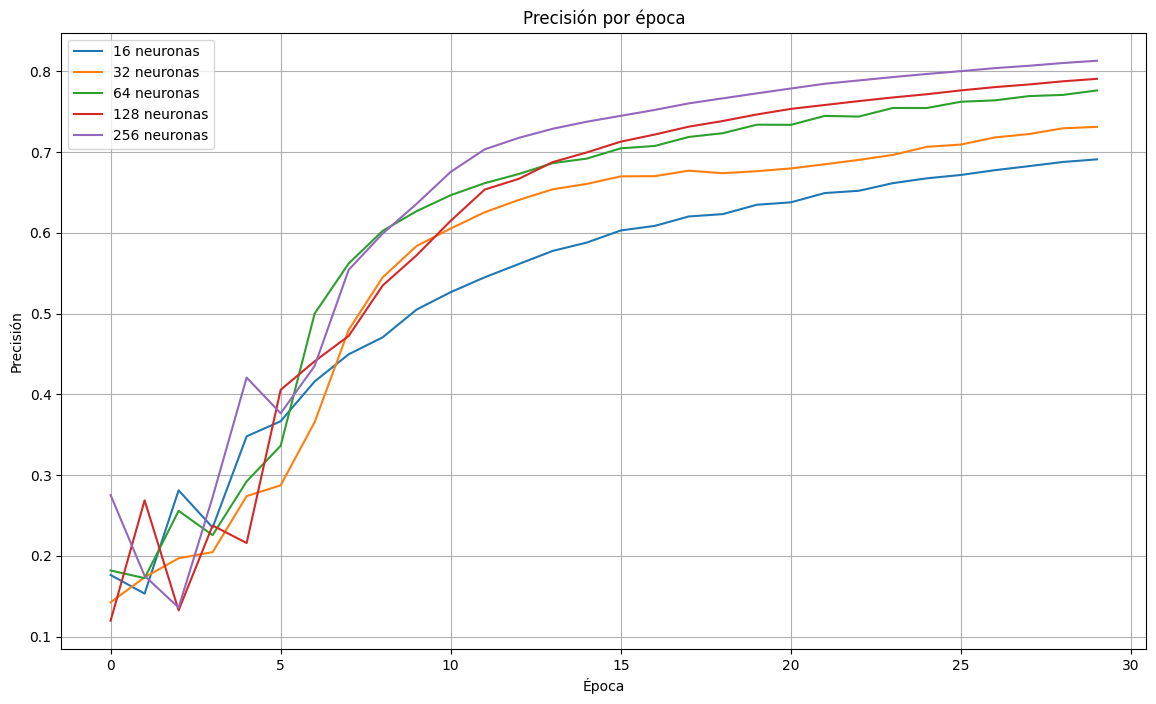

In [ ]:

plt.figure(figsize=(14, 8))
for h in ocultas:
    plt.plot(resultados[h]['precisiones'], label=f"{h} neuronas")
plt.title("Precisión por época")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


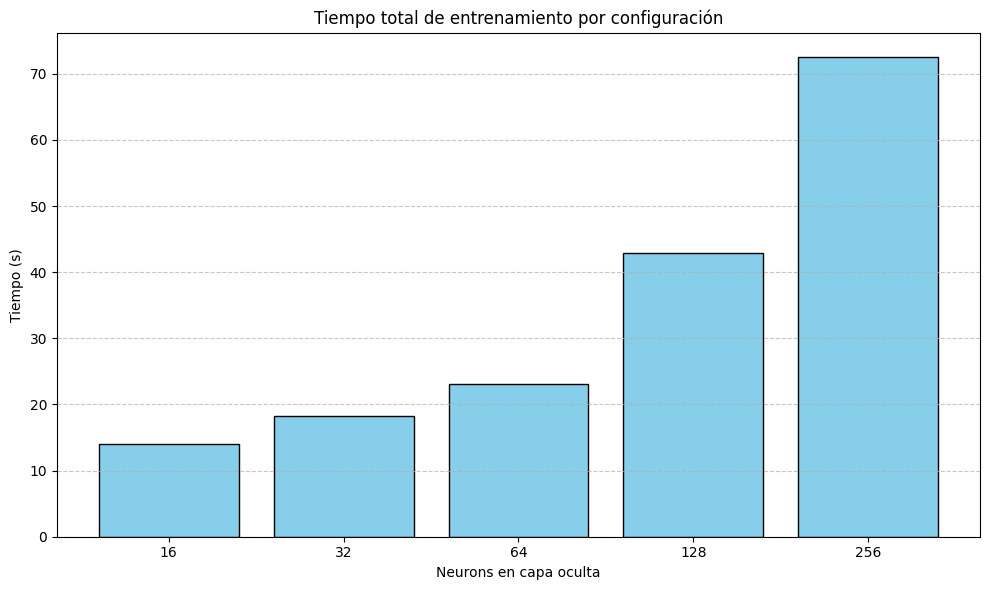

In [37]:

import matplotlib.pyplot as plt

# Datos de ejemplo tomados de tu tabla
neuronas = [16, 32, 64, 128, 256]
tiempos_entrenamiento = [14.04, 18.23, 23.14, 42.88, 72.56]  # en segundos

plt.figure(figsize=(10, 6))
plt.bar([str(n) for n in neuronas], tiempos_entrenamiento, color='skyblue', edgecolor='black')

plt.title("Tiempo total de entrenamiento por configuración")
plt.xlabel("Neurons en capa oculta")
plt.ylabel("Tiempo (s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tabla con el resumen de los resultados

In [ ]:
from tabulate import tabulate

def calcular_parametros(input_size, hidden_size, output_size):
    return (input_size + 1) * hidden_size + (hidden_size + 1) * output_size

def calcular_forward_ops(input_size, hidden_size, output_size):
    return 2 * ((input_size + 1) * hidden_size + (hidden_size + 1) * output_size)

# Crear tabla
tabla = []
for h in ocultas:
    total_tiempo = sum(resultados[h]['tiempos'])
    parametros = calcular_parametros(784, h, 10)
    forward_ops = calcular_forward_ops(784, h, 10)
    tiempo_forward = resultados[h]['tiempos'][-1]  # último forward (aprox)

    # Precisión final (última época)
    precision_entrenamiento = resultados[h]['precisiones'][-1] * 100
    precision_test = resultados[h]['precision_final_test'] * 100  # ya se había guardado antes

    fila = [
        h,
        parametros,
        forward_ops,
        f"{total_tiempo:.2f} s",
        f"{tiempo_forward:.4f} s",
        f"{precision_entrenamiento:.2f} %",
        f"{precision_test:.2f} %"
    ]
    tabla.append(fila)

# Encabezados
headers = [
    "Neuronas ocultas",
    "Parámetros del modelo",
    "Operaciones forward pass",
    "Tiempo total entrenamiento",
    "Tiempo último forward",
    "Precisión Top-1 (entrenamiento)",
    "Precisión Top-1 (test)"
]

# Mostrar tabla
print(tabulate(tabla, headers=headers, tablefmt="fancy_grid"))


╒════════════════════╤═════════════════════════╤════════════════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════════════════════╤══════════════════════════╕
│   Neuronas ocultas │   Parámetros del modelo │   Operaciones forward pass │ Tiempo total entrenamiento   │ Tiempo último forward   │ Precisión Top-1 (entrenamiento)   │ Precisión Top-1 (test)   │
╞════════════════════╪═════════════════════════╪════════════════════════════╪══════════════════════════════╪═════════════════════════╪═══════════════════════════════════╪══════════════════════════╡
│                 16 │                   12730 │                      25460 │ 14.04 s                      │ 0.3793 s                │ 69.11 %                           │ 70.70 %                  │
├────────────────────┼─────────────────────────┼────────────────────────────┼──────────────────────────────┼─────────────────────────┼───────────────────────────────────┼──────────────────────────┤
│         

#Discusión de resultados

**Regresor lineal**
* Los regresores lineales tienen la ventaja de ser matemáticamente sencillos y ligeros en cuanto a complejidad computacional. Sin embargo, no son adecuados en muchos casos reales, ya que numerosos fenómenos físicos no son lineales. Esto se evidencia en el dataset B, donde la tendencia de los datos podría aproximarse mejor a una curva cuadrática que a una recta.

* Por otro lado, estos modelos pueden fallar con datos que presentan linealidad solo en ciertos rangos. No obstante, si se decide trabajar únicamente dentro de ese rango, funcionan a la perfección.

**Red neuronal y compuerta XOR**

* A partir de regresores lineales y una sigmoide como función de activación, se evidencia lo potentes que pueden llegar a ser estos modelos a grandes rasgos. Aunque una sola neurona puede parecer inútil por sí sola, en conjunto pueden resultar muy eficaces. En este caso, el uso de una mayor cantidad de neuronas permite implementar una compuerta XOR que, luego del entrenamiento, funciona perfectamente. Esto demuestra el alto potencial del aprendizaje automático y de la inteligencia artificial.

* También resulta interesante observar la cantidad de cómputo que implica un *forwarding*, *backpropagation* y el entrenamiento en general. En conjuntos de datos grandes, el costo computacional no crece linealmente con la cantidad de neuronas en las distintas capas, lo cual es un punto clave a tener en cuenta cuando se trabaja con sistemas embebidos o con recursos limitados.


**Red neuronal y el dataset MNIST**

* A partir de las gráficas obtenidas, se evidencia el proceso de aprendizaje de la red neuronal. En las cinco configuraciones evaluadas, se observa una disminución progresiva de la función de pérdida, así como una tendencia ascendente en la precisión (accuracy) del modelo. Este comportamiento indica que la red está aprendiendo de los datos de entrenamiento y ajustando sus parámetros de manera efectiva. Asimismo, se destaca que, al incrementar el número de neuronas en la capa oculta, el rendimiento del modelo mejora, lo cual sugiere una mayor capacidad de representación.

* No obstante, este aumento en la cantidad de neuronas también conlleva un incremento considerable en el costo computacional. Tal como se observa en la gráfica del tiempo de ejecución y en la tabla de operaciones del forward pass, el número de operaciones crece de manera significativa con la complejidad del modelo. Por ejemplo, al pasar de 128 a 256 neuronas en la capa oculta, el número de operaciones prácticamente se duplica, al igual que el tiempo requerido para completar una época. Esto pone de manifiesto la necesidad de encontrar un equilibrio adecuado entre rendimiento y eficiencia computacional, especialmente en aplicaciones con recursos limitados.

* Por otro lado, las salidas obtenidas durante cada época de entrenamiento reflejan una mejora continua en la capacidad del modelo para reconocer correctamente los dígitos. A medida que avanzan las épocas, el modelo comienza a identificar con mayor precisión los patrones asociados a cada clase. En particular, se alcanzan precisiones superiores al 80% en tan solo 20 épocas de entrenamiento, lo cual demuestra la eficacia del enfoque implementado. Cabe destacar que, al extender el número de épocas, es probable que se logren mejoras adicionales en el desempeño del modelo.


* La tabla generada permite observar, de manera precisa y cuantitativa, cómo varían múltiples métricas clave en función del número de neuronas ocultas empleadas. Uno de los aspectos más notables es que el rendimiento del modelo, tanto en entrenamiento como en test, mejora de forma sostenida con el incremento del tamaño de la capa oculta. Sin embargo, la diferencia porcentual entre las precisiones de entrenamiento y test se mantiene relativamente constante, lo cual sugiere que no se presentan fenómenos significativos de sobreajuste incluso en las configuraciones más complejas.

* Además, el comportamiento de la precisión parece exhibir un fenómeno de rendimientos decrecientes: mientras que los primeros incrementos (de 16 a 64 neuronas) generan mejoras sustanciales en la precisión, los aumentos posteriores (por ejemplo, de 128 a 256 neuronas) aportan ganancias más modestas. Esto indica que, a partir de cierto punto, el aumento de la capacidad del modelo no se traduce en beneficios proporcionales, lo que puede ser un criterio importante al momento de decidir configuraciones en escenarios reales.


#**Conclusiones**



* El regresor lineal, si bien es un modelo simple y computacionalmente eficiente, presenta limitaciones importantes en contextos donde la relación entre las variables no es lineal. Su aplicabilidad queda restringida a dominios con tendencias lineales claras o acotadas, lo que lo hace inadecuado para una amplia variedad de problemas reales, como aquellos con comportamiento no lineal evidente, tal como se observó en el dataset B.

* El uso de redes neuronales, incluso con estructuras simples compuestas por regresores lineales y funciones de activación no lineales como la sigmoide, permite abordar problemas no lineales como la implementación de la compuerta XOR. Este experimento demuestra que el comportamiento colectivo de múltiples neuronas puede superar las limitaciones de modelos lineales individuales, resaltando el potencial de las redes neuronales para representar funciones complejas.

* En cuanto a la red neuronal aplicada al conjunto de datos MNIST, los resultados obtenidos muestran un claro proceso de aprendizaje a lo largo de las épocas. La disminución constante de la función de pérdida y el aumento en la precisión validan la capacidad del modelo para aprender representaciones efectivas a partir de los datos. Además, se comprobó que aumentar la cantidad de neuronas en la capa oculta mejora el rendimiento del modelo, al proporcionar mayor capacidad de representación.

* No obstante, esta mejora en el rendimiento viene acompañada de un costo computacional considerablemente mayor. El análisis del tiempo de ejecución y el número de operaciones en el *forward pass* evidencia que duplicar el número de neuronas puede duplicar también el tiempo de cómputo. Por lo tanto, es fundamental considerar las limitaciones de hardware y los recursos disponibles al diseñar una arquitectura de red, especialmente en contextos donde se requiere eficiencia energética o se dispone de poca capacidad de procesamiento, como en sistemas embebidos.

* Finalmente, se observó que en apenas 20 épocas es posible alcanzar precisiones superiores al 80%, lo que indica una convergencia rápida del modelo. Este resultado sugiere que, con una arquitectura y parámetros bien seleccionados, se pueden obtener modelos altamente efectivos en tiempos de entrenamiento relativamente cortos. Sin embargo, se recomienda evaluar la evolución del rendimiento con un mayor número de épocas para determinar el punto óptimo entre rendimiento y sobreajuste.


